<a href="https://colab.research.google.com/github/mohiteprathamesh1996/wisonsin-breast-cancer/blob/main/PredictingCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Automatic Machine Learning with H2O AutoML to predict Breast Cancer</h2>

#### Importing packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

#### Load data

In [2]:
from google.colab import files

uploaded = files.upload()

df_cancer = pd.read_csv("data.csv")

Saving data.csv to data.csv


#### Start H2O

In [3]:
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size="25G")

     |████████████████████████████████| 164.6MB 74kB/s 
  Created wheel for h2o: filename=h2o-3.32.0.4-py2.py3-none-any.whl size=164670979 sha256=bec80533a7a1647468674193dfd210a82b8e5d203b0a4bc398fc370618660e66
  Stored in directory: /root/.cache/pip/wheels/65/f4/0d/c9bb958d70c2e015c968cb91cbd7f1b486933056d422337d75
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpzev1e6d9
  JVM stdout: /tmp/tmpzev1e6d9/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpzev1e6d9/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting t

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_yn1ffv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,25 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


#### Load data to H2O

In [4]:
df_cancer.drop(columns=["id", "Unnamed: 32"], inplace=True)

h20_df_cancer = h2o.H2OFrame(df_cancer)

h20_df_cancer.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:569
Cols:31




,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
type,enum,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0,0.0,0.106,0.04996,0.1115,0.3602,0.757,6.8020000000000005,0.001713,0.002252,0.0,0.0,0.007882,0.0008948000000000001,7.93,12.02,50.41,185.2,0.07117000000000001,0.02729,0.0,0.0,0.1565,0.05504
mean,,14.127291739894547,19.289648506151124,91.96903339191556,654.8891036906859,0.09636028119507913,0.10434098418277679,0.08879931581722318,0.048919145869947306,0.18116186291739875,0.06279760984182786,0.4051720562390154,1.216853427065028,2.8660592267135288,40.337079086115935,0.007040978910369068,0.025478138840070295,0.03189371634446398,0.011796137082601056,0.02054229876977155,0.003794903866432336,16.269189806678376,25.677223198594042,107.26121265377856,880.5831282952548,0.13236859402460452,0.2542650439367314,0.27218848330404194,0.11460622319859404,0.2900755711775047,0.08394581722319859
maxs,,28.11,39.28,188.5,2501.0,0.1634,0.3454,0.4268,0.2012,0.304,0.09744,2.873,4.885,21.98,542.2,0.03113,0.1354,0.396,0.05279,0.07895,0.02984,36.04,49.54,251.2,4254.0,0.2226,1.058,1.252,0.29100000000000004,0.6638,0.2075
sigma,,3.5240488262120793,4.301035768166948,24.2989810387549,351.9141291816529,0.014064128137673616,0.0528127579325122,0.07971980870789352,0.03880284485915361,0.02741428133603571,0.007060362795084459,0.27731273298610387,0.5516483926172022,2.0218545540421085,45.49100551613178,0.003002517943839066,0.017908179325677395,0.030186060322988394,0.006170285174046867,0.0082663715287984,0.002646070967089195,4.833241580469323,6.146257623038323,33.602542269036356,569.3569926699494,0.022832429404835465,0.157336488913742,0.20862428060813235,0.06573234119594208,0.06186746753751871,0.01806126734889399
zeros,,0,0,0,0,0,0,13,13,0,0,0,0,0,0,0,0,13,13,0,0,0,0,0,0,0,0,13,13,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05372999999999999,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017000000000001,0.1812,0.056670000000000005,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.18600000000000003,0.275,0.08902
2,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.059989999999999995,0.7456,0.7869,4.585,94.03,0.00615,0.040060000000000005,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08757999999999999


#### Split training and test data

In [5]:
train, test = h20_df_cancer.split_frame(ratios=[0.70])

x = train.columns
y = "diagnosis"

x.remove(y)

#### Run H2O AutoML

In [6]:
aml = H2OAutoML(max_runtime_secs=1000, 
                balance_classes=True, 
                project_name="Final")

aml.train(x=x, y=y, training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


#### AutoML Leaderboard and Ensemble Exploration

In [7]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_2_AutoML_20210214_000203,0.992779,0.10927,0.988689,0.0316329,0.173268,0.0300217
GBM_grid__1_AutoML_20210214_000203_model_4,0.992373,0.111884,0.987389,0.0545761,0.181672,0.0330049
GBM_grid__1_AutoML_20210214_000203_model_2,0.991592,0.120347,0.986559,0.0527163,0.184203,0.0339308
DeepLearning_grid__2_AutoML_20210214_000203_model_1,0.991248,0.163564,0.987731,0.0390723,0.19123,0.0365688
DeepLearning_grid__1_AutoML_20210214_000203_model_2,0.990966,0.115264,0.986584,0.0314766,0.167477,0.0280484
GBM_3_AutoML_20210214_000203,0.990966,0.117533,0.986064,0.0395411,0.183901,0.0338195
GBM_4_AutoML_20210214_000203,0.990841,0.116287,0.986571,0.0376813,0.179482,0.0322139
GBM_5_AutoML_20210214_000203,0.990841,0.103664,0.988515,0.031164,0.165623,0.027431
GBM_grid__1_AutoML_20210214_000203_model_5,0.99056,0.112939,0.986043,0.0489966,0.180477,0.032572
GLM_1_AutoML_20210214_000203,0.99056,0.1031,0.987433,0.0334927,0.165657,0.0274424


#### Model Exploration

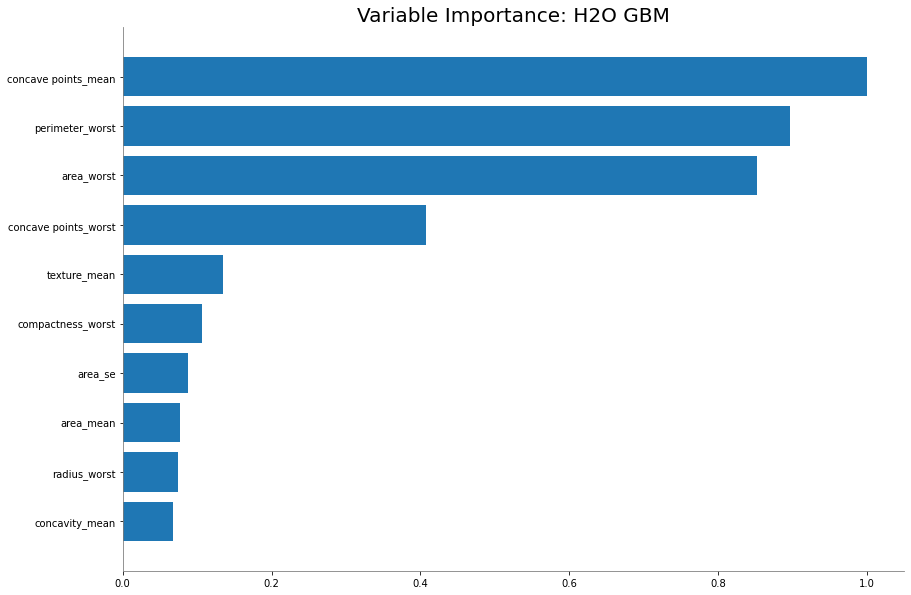

In [8]:
model = h2o.get_model("GBM_2_AutoML_20210214_000203")

model.varimp_plot()

#### Predicting on test data

In [11]:
churn_pred=aml.leader.predict(test)

aml.leader.model_performance(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.02295797931015472
RMSE: 0.15151890743453347
LogLoss: 0.07649625803041894
Mean Per-Class Error: 0.019785564275450418
AUC: 0.9978998563059578
AUCPR: 0.9973896376564603
Gini: 0.9957997126119156

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.09540095244369944: 


,,B,M,Error,Rate
0,B,106.0,3.0,0.0275,(3.0/109.0)
1,M,1.0,82.0,0.012,(1.0/83.0)
2,Total,107.0,85.0,0.0208,(4.0/192.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.095401,0.976190,83.0
1,max f2,0.095401,0.983213,83.0
2,max f0point5,0.890342,0.987342,76.0
3,max accuracy,0.095401,0.979167,83.0
4,max precision,0.999712,1.000000,0.0
5,max recall,0.009289,1.000000,91.0
6,max specificity,0.999712,1.000000,0.0
7,max absolute_mcc,0.095401,0.957891,83.0
8,max min_per_class_accuracy,0.231283,0.972477,82.0
9,max mean_per_class_accuracy,0.095401,0.980214,83.0



Gains/Lift Table: Avg response rate: 43.23 %, avg score: 42.86 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,0.999702,2.313253,2.313253,1.000000,0.999707,1.000000,0.999707,0.024096,0.024096,131.325301,131.325301,0.024096
1,2,0.020833,0.999697,2.313253,2.313253,1.000000,0.999699,1.000000,0.999703,0.024096,0.048193,131.325301,131.325301,0.048193
2,3,0.031250,0.999696,2.313253,2.313253,1.000000,0.999697,1.000000,0.999701,0.024096,0.072289,131.325301,131.325301,0.072289
3,4,0.041667,0.999696,2.313253,2.313253,1.000000,0.999696,1.000000,0.999700,0.024096,0.096386,131.325301,131.325301,0.096386
4,5,0.052083,0.999696,2.313253,2.313253,1.000000,0.999696,1.000000,0.999699,0.024096,0.120482,131.325301,131.325301,0.120482
5,6,0.104167,0.999668,2.313253,2.313253,1.000000,0.999689,1.000000,0.999694,0.120482,0.240964,131.325301,131.325301,0.240964
6,7,0.151042,0.999621,2.313253,2.313253,1.000000,0.999644,1.000000,0.999678,0.108434,0.349398,131.325301,131.325301,0.349398
7,8,0.203125,0.999455,2.313253,2.313253,1.000000,0.999555,1.000000,0.999647,0.120482,0.469880,131.325301,131.325301,0.469880
8,9,0.302083,0.997946,2.313253,2.313253,1.000000,0.998782,1.000000,0.999364,0.228916,0.698795,131.325301,131.325301,0.698795
9,10,0.401042,0.912666,2.313253,2.313253,1.000000,0.985833,1.000000,0.996025,0.228916,0.927711,131.325301,131.325301,0.927711


#### Save model

In [12]:
aml.leader.download_mojo(path = './')

'/content/GBM_2_AutoML_20210214_000203.zip'